<a href="https://colab.research.google.com/github/KostasFotakis/Transfer-Learning-VGG-16-model-on-Covid-19-infected-Chest-Xrays-/blob/main/Transferl_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout ,  Flatten , Dense, Activation, BatchNormalization, AvgPool2D,MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16,VGG19,MobileNet

In [ ]:
dataset_dir = '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED' # Dataset directory in the drive   

#########################################################################################

train_set_dir = os.path.join(dataset_dir , 'Train') # Train directory

train_covid_dir = os.path.join(train_set_dir , 'COVID19') # Train Covid_19 subfolder

train_normal_dir = os.path.join(train_set_dir , 'NORMAL') # Train Νormal subfolder
#########################################################################################

test_set_dir = os.path.join(dataset_dir , 'Test') # Test directory

test_covid_dir = os.path.join(test_set_dir , 'COVID19') # Test Covid_19 subfolder

test_normal_dir = os.path.join(test_set_dir , 'NORMAL') # Test Normal subfolder





train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])



['COVID-1000 - Copy (2).png', 'COVID-1003 - Copy (2).png', 'COVID-1033 - Copy (2).png', 'COVID-1044 - Copy (2).png', 'COVID-1030 - Copy (2).png', 'COVID-1039 - Copy (2).png', 'COVID-1040 - Copy (2).png', 'COVID-1053 - Copy (2).png', 'COVID-1050 - Copy (2).png', 'COVID-1068 - Copy (2).png']
['CHNCXR_0027_0.png', 'CHNCXR_0028_0.png', 'CHNCXR_0029_0.png', 'CHNCXR_0030_0.png', 'CHNCXR_0031_0.png', 'CHNCXR_0032_0.png', 'CHNCXR_0033_0.png', 'CHNCXR_0034_0.png', 'CHNCXR_0035_0.png', 'CHNCXR_0036_0.png']
['COVID-1002 - Copy (2).png', 'COVID-733 - Copy (2).png', 'COVID-728 - Copy (2).png', 'COVID-750.png', 'COVID-764 - Copy (2).png', 'COVID-756 - Copy (2).png', 'COVID-795.png', 'COVID-801 - Copy (2).png', 'COVID-819 - Copy (2).png', 'COVID-789 - Copy (2).png']
['CHNCXR_0001_0.png', 'CHNCXR_0004_0.png', 'CHNCXR_0005_0.png', 'CHNCXR_0006_0.png', 'CHNCXR_0007_0.png', 'CHNCXR_0008_0.png', 'CHNCXR_0009_0.png', 'CHNCXR_0010_0.png', 'CHNCXR_0012_0.png', 'CHNCXR_0013_0.png']


In [ ]:
print(f"The total number of images in the Training set is {len(train_covid_names+train_normal_names)}, COVID19 : {len(train_covid_names)} , NORMAL : {len(train_normal_names)}")

print(f"The total number of images in the Test set is {len(test_covid_names+test_normal_names)}, COVID19 : {len(test_covid_names)} , NORMAL : {len(test_normal_names)}")

The total number of images in the Training set is 644, COVID19 : 344 , NORMAL : 300
The total number of images in the Test set is 52, COVID19 : 26 , NORMAL : 26


['/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1000 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1003 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1033 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1044 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1030 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1039 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1040 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1053 - Copy (2).png']
['/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/NORMAL/CHNCXR_0027_0.png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/NORMAL/CHNCXR_0028_0.png', '/content/drive/MyDrive/ORIGINAL DTS

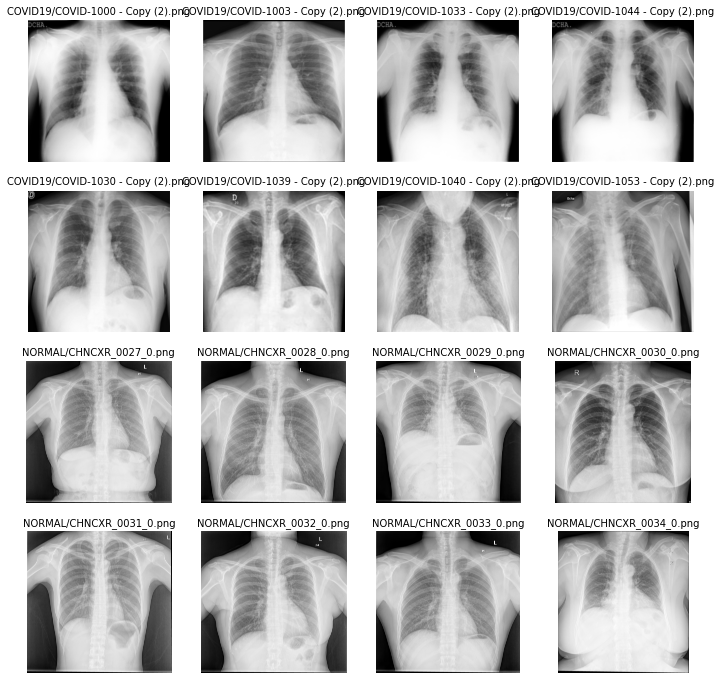

In [ ]:


import matplotlib.image as mpimg

rows = 4
cols = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_pic = [os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename)for filename in train_normal_names[0:8]]

print(covid_pic)
print(normal_pic)


merged_list = covid_pic+ normal_pic
for i , img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)

  plt.imshow(img,cmap ='gray')

plt.show()

In [ ]:
 
dgen_train = ImageDataGenerator(rescale =  1./255, 
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255)

dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_set_dir,
                                                 target_size=(224,224),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode ='binary')

validation_generator = dgen_train.flow_from_directory(train_set_dir,
                                                 target_size=(224,224),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode ='binary')

test_generator = dgen_test.flow_from_directory(test_set_dir,
                                                 target_size=(224,224),
                                                 batch_size = 32,
                                                 shuffle = False,
                                                 class_mode ='binary')

Found 516 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [ ]:
train_generator.class_indices


{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(224, 224, 3)

In [ ]:
IMG_W = 224
IMG_H = 224
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 15
"32"
BATCH_SIZE = 40

In [ ]:
vgg16_base_model = VGG16(input_shape=(IMG_W,IMG_W,3),include_top=False,weights='imagenet')

for layer in vgg16_base_model.layers:
  layer.trainable =False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()

model.add(vgg16_base_model)


model.add(Flatten())


model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=512, activation="relu"))

model.add(Dense(units=256, activation="relu"))



model.add(Dense(1, activation="sigmoid"))


model.compile(loss = "binary_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 41,062,209
Trainable params: 26,347,521
Non-trainable params: 14,714,688
_________________________________

In [ ]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = EPOCHS)

Epoch 1/15
17/17 [==============================] - 49s 2s/step - loss: 3.6751 - accuracy: 0.4903 - val_loss: 0.7050 - val_accuracy: 0.5781
Epoch 2/15
17/17 [==============================] - 37s 2s/step - loss: 0.5722 - accuracy: 0.7035 - val_loss: 0.2439 - val_accuracy: 0.9219
Epoch 3/15
17/17 [==============================] - 37s 2s/step - loss: 0.3765 - accuracy: 0.8314 - val_loss: 0.3154 - val_accuracy: 0.8359
Epoch 4/15
17/17 [==============================] - 37s 2s/step - loss: 0.2888 - accuracy: 0.8702 - val_loss: 1.9685 - val_accuracy: 0.5312
Epoch 5/15
17/17 [==============================] - 37s 2s/step - loss: 0.3403 - accuracy: 0.8760 - val_loss: 0.1765 - val_accuracy: 0.9297
Epoch 6/15
17/17 [==============================] - 37s 2s/step - loss: 0.2222 - accuracy: 0.9070 - val_loss: 0.3321 - val_accuracy: 0.8359
Epoch 7/15
17/17 [==============================] - 37s 2s/step - loss: 0.1222 - accuracy: 0.9612 - val_loss: 0.8171 - val_accuracy: 0.7422
Epoch 8/15
17/17 [==

Text(0.5, 0, 'epoch')

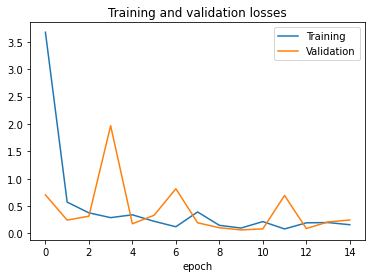

In [ ]:
history.history.keys()

#TRAINING & VALIDATION LOSSES

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

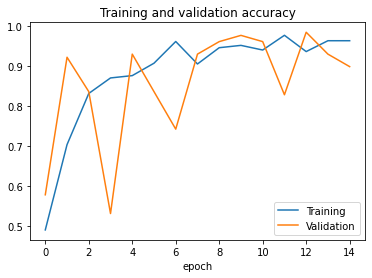

In [ ]:
#PLot of Training & Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
# test acuarcy and loss
test_loss , test_accuracy = model.evaluate(test_generator)
print('test loss : {} test accuracy : {}'.format(test_loss,test_accuracy))

2/2 [==============================] - 23s 22s/step - loss: 0.1859 - accuracy: 0.9423
test loss : 0.18594160676002502 test accuracy : 0.942307710647583


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[23  3]
 [ 0 26]]
Classification Report
              precision    recall  f1-score   support

       Covid       1.00      0.88      0.94        26
      Normal       0.90      1.00      0.95        26

    accuracy                           0.94        52
   macro avg       0.95      0.94      0.94        52
weighted avg       0.95      0.94      0.94        52



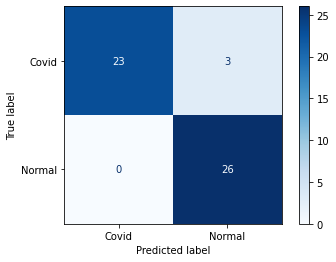

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred = model.predict_generator(test_generator, 52 // 32+1)
y_pred = np.where(Y_pred>0.5, 1, 0)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Covid', 'Normal']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
model.save_weights("best_transfer_learning_model_weights.h5")


In [ ]:
model.save("best_transfer_learning_model.h5")